In [1]:
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from global_config import *

## Modifiable Configuration

In [3]:
import os.path as osp
# timestamp = "20250326_094633" # all agumentations, CE+Dice+lovasz(0.2:1:0.3), decode:axuiliaries(1:1.6), 16k
# timestmap = "20250326_121549" # all agumentations, only CE, decode:auxiliaries(1:4),16k
# #timestamp = "20250326_131039" # all agumentations, full version of model, 20k
# #timestamp = "20250326_170145" # all agumentations, CE+Dice+lovasz(0.2:0.8:0.5), decode:axuiliaries(1.5:1.6), 24k

# timestamp = "20250327_012148" # 20k 5e-3
timestamp = "20250327_030322" #24k more lovasz 0.01
# timestamp = "20250327_050634"

log_suffix_path = f"{timestamp}/vis_data/scalars.json"
log_prefix_path = OUT_BISENETV2_FCN_DIR_PATH

loss_metrics = ['loss', 'decode.loss_ce', "decode.loss_lovasz"]
acc_metrics = ["decode.acc_seg"]

for i in range(4):
    loss_metrics.append(f"aux_{i}.loss_ce")
    loss_metrics.append(f"aux_{i}.loss_dice")
    loss_metrics.append(f"aux_{i}.loss_lovasz")
    acc_metrics.append(f"aux_{i}.acc_seg")

val_metrics = ["aAcc", "mFscore", "mIoU", "mPrecision", "mRecall", "mAcc", "mDice"]

loss_metrics, acc_metrics

(['loss',
  'decode.loss_ce',
  'decode.loss_lovasz',
  'aux_0.loss_ce',
  'aux_0.loss_dice',
  'aux_0.loss_lovasz',
  'aux_1.loss_ce',
  'aux_1.loss_dice',
  'aux_1.loss_lovasz',
  'aux_2.loss_ce',
  'aux_2.loss_dice',
  'aux_2.loss_lovasz',
  'aux_3.loss_ce',
  'aux_3.loss_dice',
  'aux_3.loss_lovasz'],
 ['decode.acc_seg',
  'aux_0.acc_seg',
  'aux_1.acc_seg',
  'aux_2.acc_seg',
  'aux_3.acc_seg'])

In [4]:
log_path = osp.join(log_prefix_path, log_suffix_path)
log_vis_res_saving_prefix_path = osp.join(osp.dirname(osp.dirname(log_path)), "vis_res")
if not osp.exists(log_vis_res_saving_prefix_path):
    os.makedirs(log_vis_res_saving_prefix_path)
log_path, log_vis_res_saving_prefix_path

('c:\\Users\\10140\\Desktop\\Codebase\\MyProjects\\AI6126project1_lily\\out\\bisenetv2_fcn\\20250327_030322/vis_data/scalars.json',
 'c:\\Users\\10140\\Desktop\\Codebase\\MyProjects\\AI6126project1_lily\\out\\bisenetv2_fcn\\20250327_030322\\vis_res')

In [5]:
with open(log_path, "r") as f:
    json_list = f.readlines()
type(json_list), len(json_list)

(list, 288)

In [6]:
eval(json_list[0])

{'lr': 0.0027927927927927894,
 'data_time': 0.01075451374053955,
 'loss': 5.241795492172241,
 'decode.loss_ce': 0.697960501909256,
 'decode.loss_dice': 0.07952601984143257,
 'decode.loss_lovasz': 0.9117807865142822,
 'decode.acc_seg': 56.144596099853516,
 'aux_0.loss_ce': 1.081592607498169,
 'aux_0.acc_seg': 46.900779724121094,
 'aux_1.loss_ce': 0.9033737182617188,
 'aux_1.acc_seg': 47.29398727416992,
 'aux_2.loss_ce': 0.8197188198566436,
 'aux_2.acc_seg': 47.11680603027344,
 'aux_3.loss_ce': 0.7478429794311523,
 'aux_3.acc_seg': 53.77022171020508,
 'time': 0.24612028598785402,
 'iter': 100,
 'memory': 7950,
 'step': 100}

In [7]:
df_train = pd.DataFrame()
df_val = pd.DataFrame()
for each in json_list: #?json_list[:-1]
    if "aAcc" in each:
        df_val = df_val.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.loss_dice,decode.loss_lovasz,decode.acc_seg,aux_0.loss_ce,aux_0.acc_seg,aux_1.loss_ce,aux_1.acc_seg,aux_2.loss_ce,aux_2.acc_seg,aux_3.loss_ce,aux_3.acc_seg,time,iter,memory,step
0,0.002095,0.018148,4.800650,0.572040,0.080046,0.913497,61.138302,0.972811,34.257507,0.829129,45.006802,0.764773,46.143967,0.668354,50.474403,0.264093,100.0,7951.0,100.0
1,0.002695,0.019641,3.892701,0.490468,0.069206,0.899997,69.348938,0.755416,53.246613,0.621923,57.956699,0.559756,64.454926,0.495935,69.731583,0.263014,200.0,4499.0,200.0
2,0.003296,0.011933,3.619160,0.473793,0.064586,0.887533,71.848526,0.631542,66.999329,0.563987,67.613449,0.523585,69.682709,0.474134,71.350494,0.246375,300.0,4502.0,300.0
3,0.003896,0.015083,3.397491,0.440685,0.063075,0.878615,63.656120,0.584057,55.549206,0.525858,60.883446,0.482956,61.605518,0.422245,66.033104,0.257228,400.0,4502.0,400.0
4,0.004497,0.015444,3.063317,0.359558,0.051393,0.852348,73.118370,0.523431,63.703747,0.477692,65.407211,0.432738,67.221748,0.366157,69.950768,0.258751,500.0,4502.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000177,0.016574,1.044049,0.049054,0.007370,0.219549,95.603584,0.372000,71.088402,0.197596,81.317047,0.113914,86.067131,0.084564,92.276100,0.260922,29600.0,4500.0,29600.0
296,0.000147,0.011449,1.072056,0.048742,0.007506,0.221507,96.519562,0.376829,76.006783,0.207670,88.146233,0.124653,92.471176,0.085147,93.287453,0.249241,29700.0,4497.0,29700.0
297,0.000116,0.013753,1.030490,0.047008,0.007365,0.211139,95.990646,0.364721,79.113579,0.197562,88.614998,0.119266,92.607208,0.083430,92.896469,0.256104,29800.0,4501.0,29800.0
298,0.000084,0.011222,1.135729,0.057428,0.007997,0.254966,95.387161,0.373153,65.932556,0.216053,80.439285,0.129121,89.092903,0.097011,91.521301,0.251198,29900.0,4500.0,29900.0


In [ ]:
df_val["mFscore_4_mean"] = df_val["mFscore"].rolling(window=4, min_periods=1).mean()
df_val["mIoU_4_mean"] = df_val["mIoU"].rolling(window=4, min_periods=1).mean()

In [ ]:
best_idx = df_val["mIoU"].idxmax() 
best_idx, df_val.iloc[best_idx]["mFscore"], df_val.iloc[best_idx]["mIoU"], df_val.iloc[best_idx]["mAcc"], df_val.iloc[best_idx]["mDice"]

(57, 85.16, 71.03, 78.82, 80.68)

In [ ]:
df_val

,aAcc,mFscore,mPrecision,mRecall,mIoU,mAcc,mDice,data_time,time,step,mFscore_4_mean,mIoU_4_mean
0,70.70,43.97,55.85,14.23,10.75,14.23,13.89,0.003056,0.013211,500.0,43.9700,10.750000
1,79.20,60.65,67.67,49.84,40.21,49.84,51.08,0.005673,0.014172,1000.0,52.3100,25.480000
2,83.99,66.44,69.45,62.95,50.78,62.95,62.94,0.001810,0.009606,1500.0,57.0200,33.913333
3,85.85,72.61,74.92,69.22,56.44,69.22,68.79,0.001797,0.009899,2000.0,60.9175,39.545000
4,86.65,74.25,78.13,69.60,58.39,69.60,70.34,0.001895,0.010016,2500.0,68.4875,51.455000
5,87.39,74.34,76.66,71.03,58.61,71.03,70.42,0.001724,0.009647,3000.0,71.9100,56.055000
6,88.48,77.77,80.32,72.17,61.91,72.17,73.67,0.001725,0.009688,3500.0,74.7425,58.837500
7,88.83,78.26,81.18,72.37,62.47,72.37,74.14,0.001929,0.010021,4000.0,76.1550,60.345000
8,88.38,79.06,80.60,74.24,63.28,74.24,74.90,0.001712,0.010007,4500.0,77.3575,61.567500
9,89.06,80.31,81.94,75.11,64.72,75.11,76.08,0.001822,0.010356,5000.0,78.8500,63.095000


### trainning and validation csv

In [ ]:
df_train.to_csv(osp.join(log_vis_res_saving_prefix_path, "train_log.csv"), index=False)
df_val.to_csv(osp.join(log_vis_res_saving_prefix_path, "val_log.csv"), index=False)

In [ ]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

### training loss

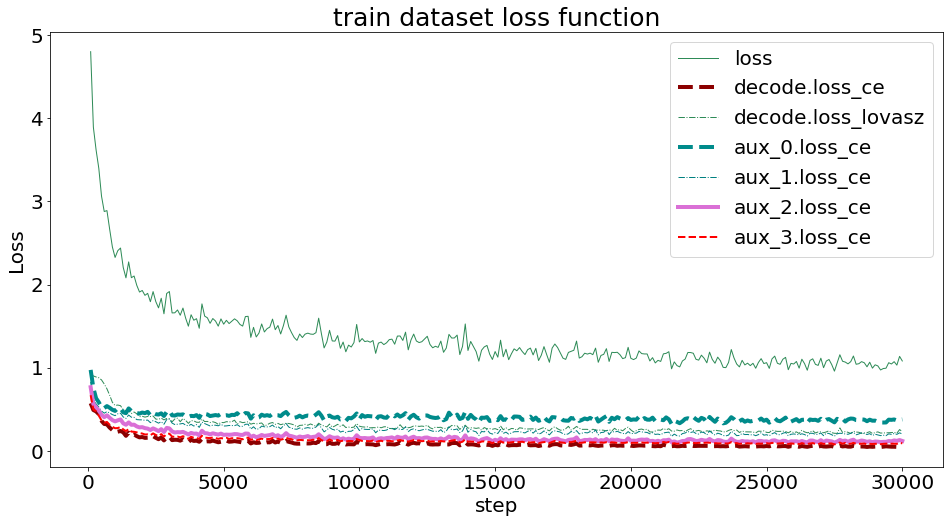

In [ ]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in loss_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('train dataset loss function', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "tran_loss.jpg"), dpi=120, bbox_inches='tight')

plt.show()

### train accuracy

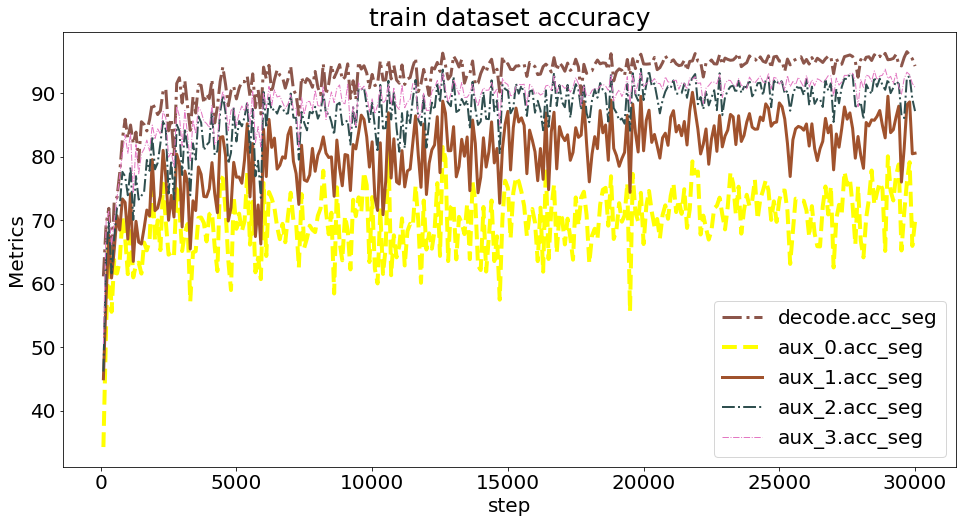

In [ ]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in acc_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('train dataset accuracy', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "train_accuracy.jpg"), dpi=120, bbox_inches='tight')

plt.show()

### validation metrics

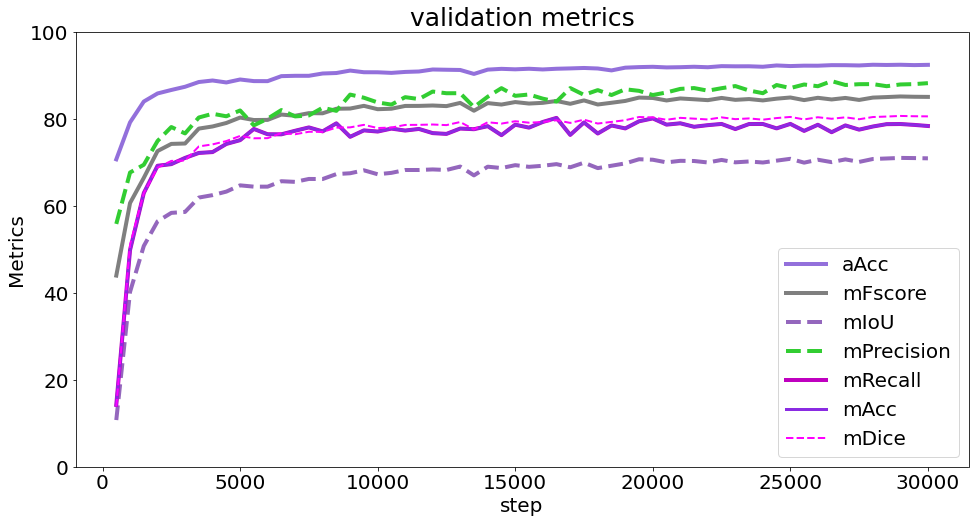

In [ ]:
plt.figure(figsize=(16, 8))

x = df_val['step']
for y in val_metrics:
    try:
        plt.plot(x, df_val[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('validation metrics', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "val_metrics.jpg"), dpi=120, bbox_inches='tight')

plt.show()